# Project: Investigating The FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The data in this report comes from the FBI's National Instant Criminal Background Check System.
These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.
>
### Questions for Analysis
>1. Did the number of background checks changed over the years?
>
>2. Which state have the highest background checks ratio?
>
>3. Is there a relation between background checks and higher education percentage?
>
>4. Is there a relation between background checks and per capit income?
>
>5. Is there a relation between background checks and poverty percentage?

In [39]:
#import statements for all of the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading the files
gun_df = pd.read_excel('gun_data.xlsx')
census_df = pd.read_csv('U.S. Census Data.csv')

In [40]:
gun_df.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [41]:
census_df.head(3)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this analysis we're only going to need the month, state and totals columns from the Gun data data frame, so we're going to take those and remove every thing else.

In [42]:
gun_df = gun_df[['month', 'state', 'totals']]
gun_df.head(3)

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394


And from the census data we're only going to need the population, education, income and poverty rows. and we don't need the Fact note column. 

In [43]:
#choosing the rows
census_df = census_df.loc[[0,35,48,49]] 

#removing the fact note column from the census_df
census_df.drop(['Fact Note'], axis=1, inplace=True)
census_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
35,"Bachelor's degree or higher, percent of person...",23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,27.30%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%
48,Per capita income in past 12 months (in 2015 d...,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554","$26,829",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"
49,"Persons in poverty, percent",17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,14.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%


and now we'll take a look on the data types of each column

In [44]:
#exploring the data types in gun_df 
gun_df.dtypes

month     object
state     object
totals     int64
dtype: object

In [45]:
#exploring the data types in census_Df
census_df.dtypes

Fact              object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object
Rhode Island      object


In [46]:
#chceking for missing data in gun_df
gun_df.isnull().sum()

month     0
state     0
totals    0
dtype: int64

In [47]:
#checking for duplicates
gun_df.duplicated().any()

False

In [48]:
#checking for duplicates in census data
census_df.duplicated().sum()

0

In [49]:
#checking for missing data in census
census_df.isnull().any()

Fact              False
Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota    

### Data Cleaning
#### Here we're going to:
>Rename the rows in census_df to more convenient names
>
>Transpose the census_df makeing the rows into columns
>
>Transform data types
>
>Merge the census and the gun data frames 

In [50]:
#renaming the columns to more convenient names
census_df['Fact'] = ['population_16', 'higher_edu_15', 'income_15', 'poverty']  
census_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,population_16,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
35,higher_edu_15,23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,27.30%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%
48,income_15,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554","$26,829",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"
49,poverty,17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,14.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%


In [51]:
#making rows into columns 
census_df= census_df.transpose()
census_df.columns = census_df.iloc[0]
census_df.head(3)

Fact,population_16,higher_edu_15,income_15,poverty
Fact,population_16,higher_edu_15,income_15,poverty
Alabama,"4,863,300",23.50%,"$24,091",17.10%
Alaska,"741,894",28.00%,"$33,413",9.90%


In [52]:
#droping the first row that we accedintly made
census_df.drop('Fact', axis='index', inplace=True)
census_df.head()

Fact,population_16,higher_edu_15,income_15,poverty
Alabama,"4,863,300",23.50%,"$24,091",17.10%
Alaska,"741,894",28.00%,"$33,413",9.90%
Arizona,"6,931,071",27.50%,"$25,848",16.40%
Arkansas,"2,988,248",21.10%,"$22,798",17.20%
California,"39,250,017",31.40%,"$30,318",14.30%


In [53]:
#striping the strings from the signs so we can transform them into numeric dtypes 
census_df['income_15']= census_df['income_15'].str.strip('$')
census_df['higher_edu_15']= census_df['higher_edu_15'].str.strip('%')
census_df['poverty']= census_df['poverty'].str.strip('%')
census_df = census_df.replace(',', '', regex=True)
census_df.head()

Fact,population_16,higher_edu_15,income_15,poverty
Alabama,4863300,23.50,24091,17.10
Alaska,741894,28.00,33413,9.90
Arizona,6931071,27.50,25848,16.40
Arkansas,2988248,21.10,22798,17.20
California,39250017,31.40,30318,14.30


In [54]:
#transforming the strings into numeric dtypes
census_df['population_16'] = census_df['population_16'].astype(int)
census_df['higher_edu_15'] = census_df['higher_edu_15'].astype(float)
census_df['income_15'] = census_df['income_15'].astype(float)
census_df['poverty'] = census_df['poverty'].astype(float)
census_df.dtypes

Fact
population_16      int32
higher_edu_15    float64
income_15        float64
poverty          float64
dtype: object

these are steps necessary for our merge:

In [55]:
#creating a new column "state" from the index
census_df['state'] = census_df.index
census_df.head(1)

Fact,population_16,higher_edu_15,income_15,poverty,state
Alabama,4863300,23.5,24091.0,17.1,Alabama


In [56]:
#reseting the index scince it's no longer needed
census_df = census_df.reset_index()
census_df.head(1)

Fact,index,population_16,higher_edu_15,income_15,poverty,state
0,Alabama,4863300,23.5,24091.0,17.1,Alabama


In [57]:
#transforming the month column to date time
gun_df['month'] = pd.to_datetime(gun_df['month'])
gun_df.dtypes

month     datetime64[ns]
state             object
totals             int64
dtype: object

In [58]:
#merging the two data frmaes
df = pd.merge(gun_df, census_df, on='state', right_index=False)

In [59]:
#making sure there is no missing values
df.isnull().sum()

month            0
state            0
totals           0
index            0
population_16    0
higher_edu_15    0
income_15        0
poverty          0
dtype: int64

In [60]:
#extracting a year column wich is going to be helpful later in query
df['year'] = pd.DatetimeIndex(df['month']).year
df.tail(10)

,month,state,totals,index,population_16,higher_edu_15,income_15,poverty,year
11340,1999-08-01,Wyoming,3047,Wyoming,585501,25.7,29803.0,11.3,1999
11341,1999-07-01,Wyoming,2513,Wyoming,585501,25.7,29803.0,11.3,1999
11342,1999-06-01,Wyoming,2602,Wyoming,585501,25.7,29803.0,11.3,1999
11343,1999-05-01,Wyoming,2531,Wyoming,585501,25.7,29803.0,11.3,1999
11344,1999-04-01,Wyoming,2702,Wyoming,585501,25.7,29803.0,11.3,1999
11345,1999-03-01,Wyoming,2776,Wyoming,585501,25.7,29803.0,11.3,1999
11346,1999-02-01,Wyoming,2643,Wyoming,585501,25.7,29803.0,11.3,1999
11347,1999-01-01,Wyoming,2180,Wyoming,585501,25.7,29803.0,11.3,1999
11348,1998-12-01,Wyoming,3379,Wyoming,585501,25.7,29803.0,11.3,1998
11349,1998-11-01,Wyoming,107,Wyoming,585501,25.7,29803.0,11.3,1998


In [61]:
#removing the accedintly made index column
df.drop('index', axis=1, inplace=True)

In [62]:
df.head(1)

,month,state,totals,population_16,higher_edu_15,income_15,poverty,year
0,2017-09-01,Alabama,32019,4863300,23.5,24091.0,17.1,2017


<a id='eda'></a>
## Exploratory Data Analysis



### Exporing the different variables

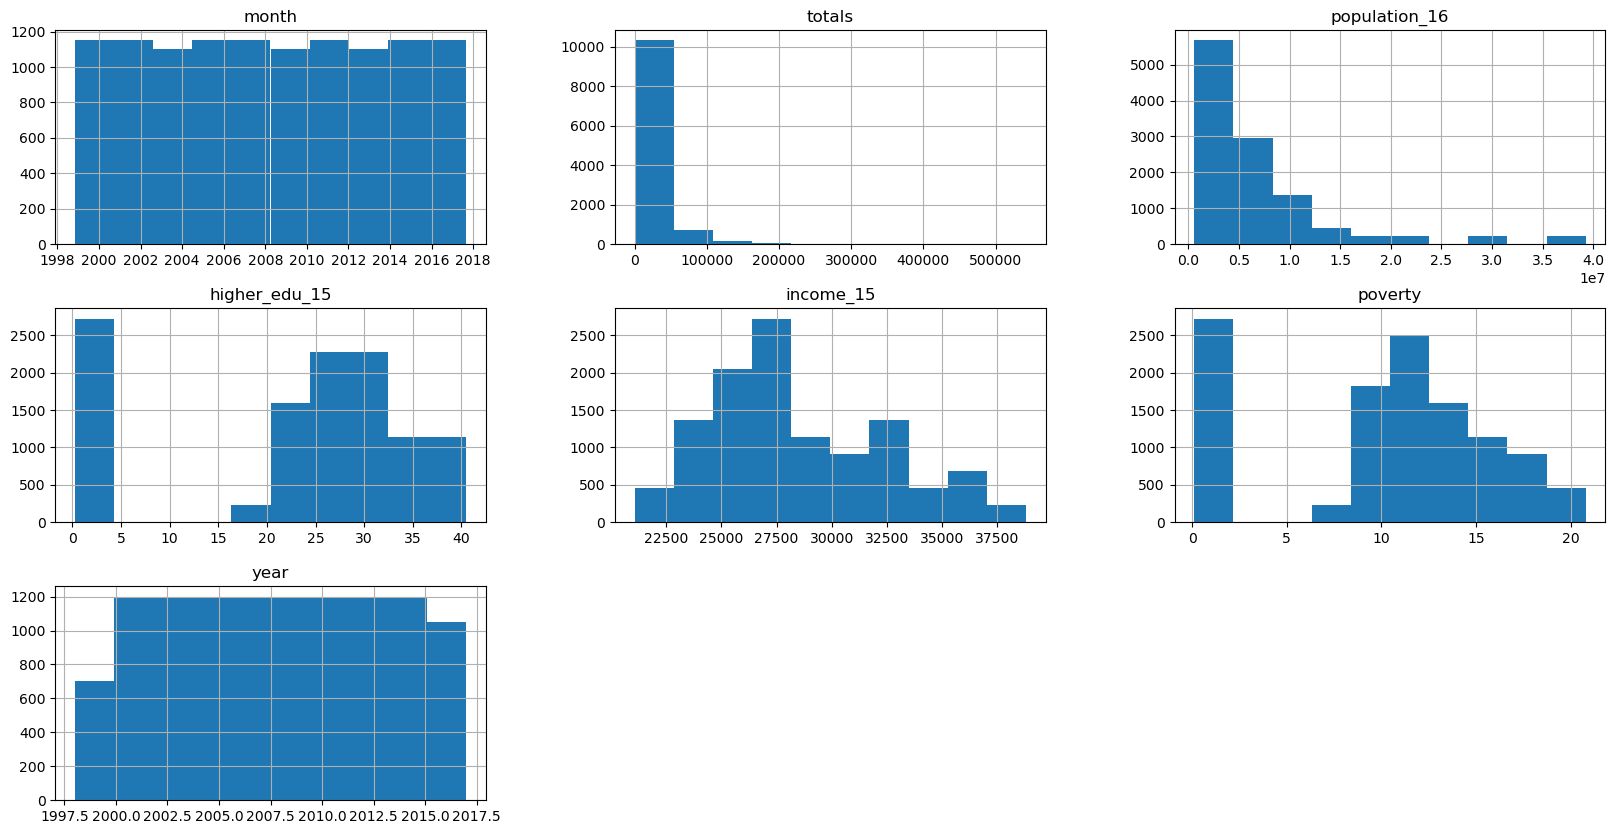

In [63]:
#exploring the data frame
df.hist(figsize=(20,10));

from these histograms we can see that the population and income are left skewed 


### The change in background checks over time


here we are going to make a bar plot to see the change of background checks over time.

In [64]:
#making a function to make bar for later
def bar(x, y, clr, xlabel, ylabel, title):
    plt.bar(x, y, color = clr)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

In [65]:
#getting the total amount of background checks every year
year_checks = gun_df.groupby(gun_df.month.dt.year)['totals'].sum().to_dict()

#seeing a description for the background checks data
gun_df.groupby(gun_df.month.dt.year)['totals'].sum().describe()

count    2.000000e+01
mean     1.348113e+07
std      6.497589e+06
min      8.918980e+05
25%      8.760006e+06
50%      1.192763e+07
75%      1.835885e+07
max      2.742551e+07
Name: totals, dtype: float64

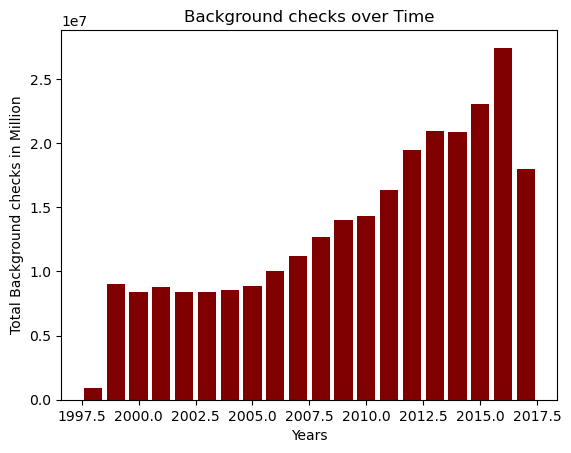

In [66]:
#visualising in a barplot
years = list(year_checks.keys())
totals = list(year_checks.values())
clr = 'maroon'
xl = 'Years'
yl = 'Total Background checks in Million'
title = 'Background checks over Time'
bar(years, totals, clr, xl, yl, title )

as we can see from the graph above that the background checks have grown exponentially over the years, strting with 8.9e+05 at 1998 to reach a maximum value in 2016 with 2.7e+07.

### The State with the most background checks
>We're going to use ratio to account for the number of people in a state

In [67]:
#getting a list of states
states = df.state.unique()
states[:5]

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
      dtype=object)

In [68]:
#getting the total of background checks for 2016 for each state
state_16 = df.query( 'year == 2016' ).groupby('state')
#getting the totals and saving them into a dict
state_totals16 = state_16['totals'].sum().to_dict()

# getting the values of the dict  and saving them into a list
state_totals = list(state_totals16.values())

In [69]:
#getting the population and saving it to a dict
population = df.query('year == 2016')['population_16'].to_dict()
population = list(population.values())
checks_ratio = [i / j for i,j in zip(state_totals, population)]


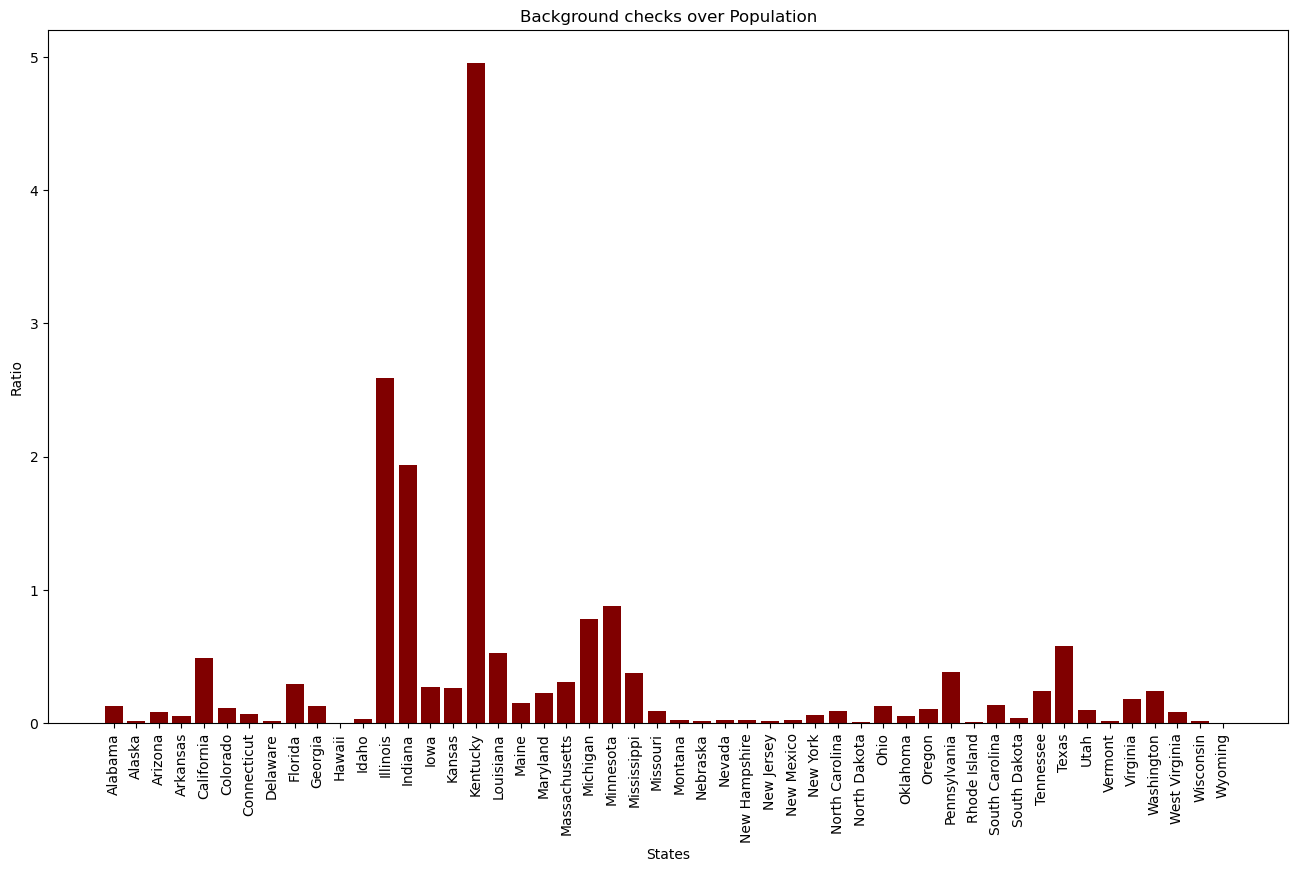

In [70]:
#getting a list of states to use in the diagram
states = list(state_totals16.keys())
#visualising
fig = plt.figure(figsize =(16, 9))
clr = 'maroon'
xl = 'States'
yl = 'Ratio'
ti = 'Background checks over Population'
bar(states, checks_ratio, clr, xl, yl, ti)
plt.xticks(rotation= 90);

Turns out that Kentucky and Illinois have the highest background checks in respect to thier population.

## The relation between  eductaion and background checks

In [71]:
#here we're getting the number of background checks for each state in the year 2015
checks_15 = df.query('year == 2015').groupby('state')['totals'].sum().tolist()

In [72]:
#getting the education percentage for each state and saving it to a list
education = df.query('year == 2015').groupby('state')['higher_edu_15'].unique().tolist()


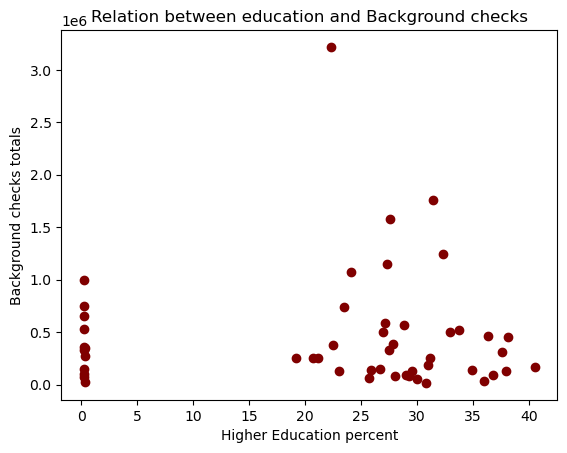

In [73]:
#ploting the relation
plt.scatter(education, checks_15, c="maroon");
plt.xlabel('Higher Education percent')
plt.ylabel('Background checks totals')
plt.title('Relation between education and Background checks');

this scatter plot indecates that there is no relation between higher education and background checks  

## The Relation between per income capita and background checks

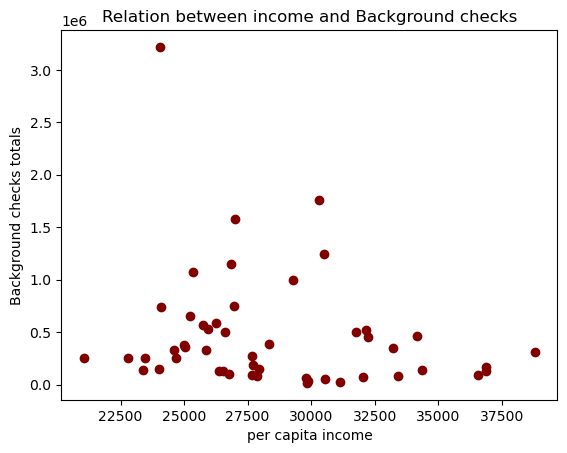

In [74]:
#getting the income per capita for each state and saving it to a list
income = df.query('year == 2015').groupby('state')['income_15'].unique().tolist()

#ploting the relation
plt.scatter(income, checks_15, c="maroon");
plt.xlabel('per capita income')
plt.ylabel('Background checks totals')
plt.title('Relation between income and Background checks');

seems like this scatter plot also indecates that there is no relation between income and background checks  

## The Relation between poverty and background checks

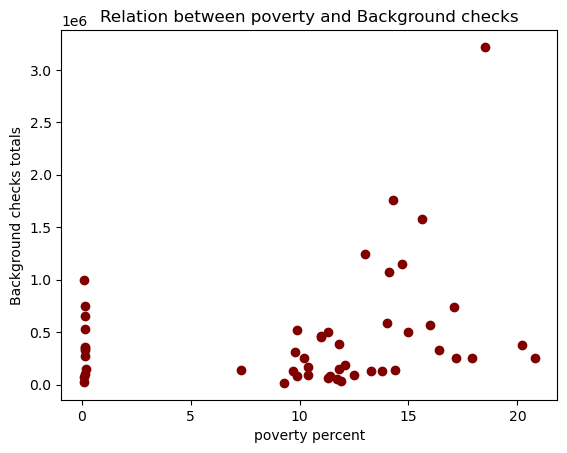

In [75]:
#getting the poverty percentage for each state and saving it to a list
poverty = df.query('year == 2015').groupby('state')['poverty'].unique().tolist()

#ploting the relation
plt.scatter(poverty, checks_15, c="maroon");
plt.xlabel('poverty percent')
plt.ylabel('Background checks totals')
plt.title('Relation between poverty and Background checks');

once again this scatter plot shows that there is no relation between poverty percentage in a state and the number of background checks in it.

<a id='conclusions'></a>
## Conclusions
### limitations 
>The census data was very limited to couple years namely 2015 and 2016, so we can't compare the gun data from other years.
>
>The gun data did not contain the actuall number of guns sold which would've been much more useful, and propably would've had a stronger reltaion ships with the other variables.
#### The change in background checks over time
>We saw that there was a significant increase in background checks over the years
>
#### The State with the most background
> We found that Kentucky and Illinois had the biggest ratio for background checks over population
>
#### The relation between eductaion and background checks 
>there was a no strong corelation between education percentage and background checks
>
#### The Relation between per income capita and background checks
>there was a no strong corelation between income and background checks
>
#### The Relation between poverty and background checks
>there was no corelation between poverty and background checks
